In [2]:
!pip install yfinance pandas matplotlib beautifulsoup4 lxml


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 60.0 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 186.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 150.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 156.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 149.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 170.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 182.0 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=fe97021c6211639789a

In [10]:
# Ejercicio 1

import yfinance as yf
import pandas as pd


tesla = yf.Ticker("TSLA")


tesla_data = tesla.history(period="max")


tesla_data.reset_index(inplace=True)


print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [16]:

#Ejercicio 2
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO 

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

if revenue_table is None:
    raise ValueError(" No se encontró la tabla de ingresos de Tesla.")


df_list = pd.read_html(StringIO(str(revenue_table)))
tesla_revenue = df_list[0]

tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue.dropna()
tesla_revenue = tesla_revenue[tesla_revenue['Date'].str.contains("20")]
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != "-"]


print(tesla_revenue.tail())


          Date Revenue
58  2010-09-30     $31
59  2010-06-30     $28
60  2010-03-31     $21
62  2009-09-30     $46
63  2009-06-30     $27


In [17]:
#Ejercicio 3

import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")


gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)


print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
#Ejercicio 4
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)


soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")


revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break


if revenue_table is None:
    raise ValueError(" No se encontró la tabla de ingresos de GME.")


df_list = pd.read_html(StringIO(str(revenue_table)))
gme_revenue = df_list[0]


gme_revenue.columns = ['Date', 'Revenue']


gme_revenue = gme_revenue.dropna()
gme_revenue = gme_revenue[gme_revenue['Date'].str.contains("20")]
gme_revenue = gme_revenue[gme_revenue['Revenue'] != "-"]


print(gme_revenue.tail())


          Date Revenue
61  2010-01-31  $3,524
62  2009-10-31  $1,835
63  2009-07-31  $1,739
64  2009-04-30  $1,981
65  2009-01-31  $3,492


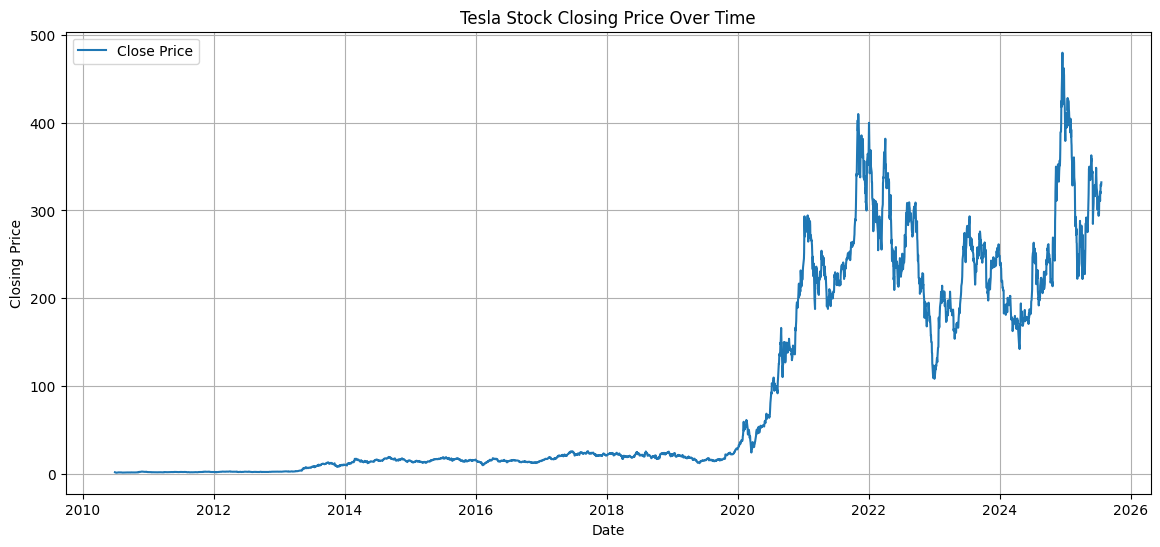

In [7]:
#Ejercicio 5
import matplotlib.pyplot as plt

def make_graph(stock_data, stock_name):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.title(f"{stock_name} Stock Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(tesla_data, 'Tesla')


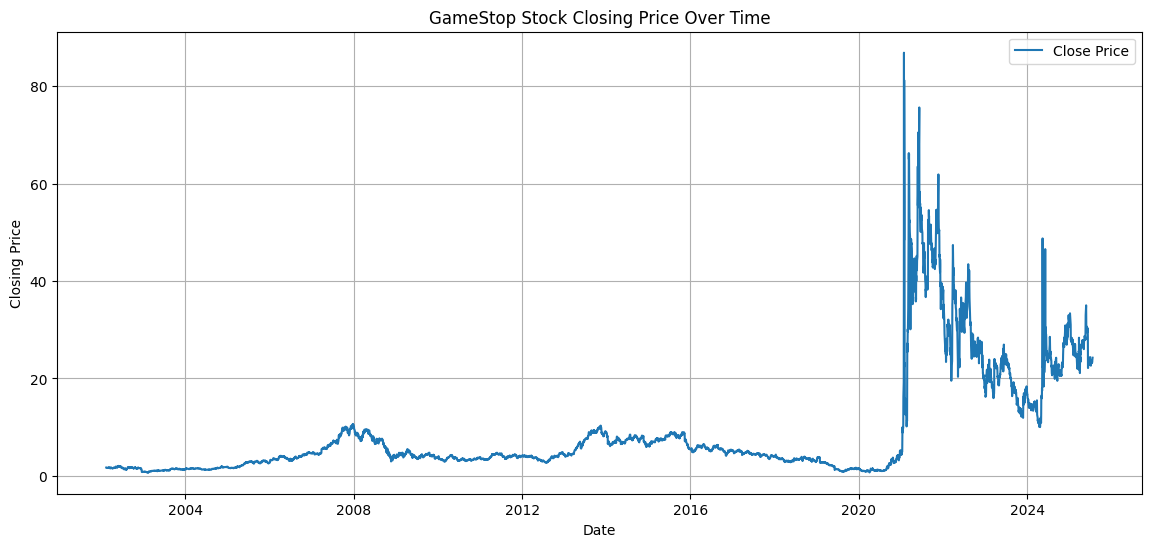

In [8]:
#Ejercicio 6
make_graph(gme_data, 'GameStop')
